In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")


In [2]:
games = pd.read_csv('vgsales.csv')

In [3]:
# Verify data was pulled in successfully.
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
# Check datatypes for the columns.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
games.Year.isnull().sum()

271

## Takeaways
* The 'Year' column has missing values, so I will have to drop the missing values before converting to and integer datatype.
* I will also drop missing values from all other columns as well.

In [6]:
# Drop missing values.
games.dropna(inplace=True)

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
# Convert 'Year' column into integer datatype.
games.Year = games.Year.astype(int)

In [9]:
# Verify change.
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [10]:
# Lowercase all columns.
columns = [col.lower() for col in games.columns]
games.columns = columns

In [11]:
# Drop all observations where global sales are less than one million.
games = games[games.global_sales > 1.0]

In [12]:
# Create a dataframe for the games that sold less than a million copies globally.
low_sales = games[games.global_sales < 1.0]

In [13]:
# Take a peek at the different platforms that produced a game/games that sold over one million globally.
games.platform.value_counts()

PS2     316
PS3     242
X360    231
PS      199
Wii     155
DS      142
PS4      73
NES      72
GBA      68
PC       68
PSP      56
GB       53
XB       52
N64      50
SNES     48
3DS      47
GC       46
XOne     43
2600     23
WiiU     19
GEN      11
PSV       7
DC        6
SAT       3
SCD       1
Name: platform, dtype: int64

### Which country has the most video game sales?

In [14]:
games

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
2049,2051,Oshare Majo Love and Berry: DS Collection,DS,2006,Misc,Sega,0.00,0.00,1.01,0.00,1.01
2050,2052,Monster Rancher,PS,1997,Simulation,Tecmo Koei,0.12,0.08,0.74,0.07,1.01
2051,2053,The LEGO Movie Videogame,PS3,2014,Action,Warner Bros. Interactive Entertainment,0.33,0.48,0.02,0.18,1.01
2052,2054,DiRT 2,PS3,2009,Racing,Codemasters,0.27,0.53,0.00,0.20,1.01


# Takeaways
* I have the dataframe in a state where I am ready to begin Exploratory Data Analysis.
* My target variable will be 'na_sales'.
* I will have to drop 'global_sales' to prevent data leakage.

In [15]:
# Create a function that will acquire the data and prepare it for Exploratory Data Analysis
def acquire_and_prep():
    games = pd.read_csv('vgsales.csv')
    # Drop missing values.
    games.dropna(inplace=True)
    # Convert 'Year' column into integer datatype.
    games.Year = games.Year.astype(int)
    # Lowercase all columns.
    columns = [col.lower() for col in games.columns]
    games.columns = columns
    # Drop all observations where global sales are less than one million.
    games = games[games.global_sales > 1.0]
    return games

In [16]:
games = acquire_and_prep()

In [17]:
# Create a column that gives the age of the game as opposed to the year it was released.
games['age'] = 2022 - games.year

In [18]:
# Create a column that combines all sales outside of North America
games['combined_sales'] = games.eu_sales + games.jp_sales + games.other_sales

In [19]:
games

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,16,41.25
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,37,11.16
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,14,19.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,13,17.25
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,26,20.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,2051,Oshare Majo Love and Berry: DS Collection,DS,2006,Misc,Sega,0.00,0.00,1.01,0.00,1.01,16,1.01
2050,2052,Monster Rancher,PS,1997,Simulation,Tecmo Koei,0.12,0.08,0.74,0.07,1.01,25,0.89
2051,2053,The LEGO Movie Videogame,PS3,2014,Action,Warner Bros. Interactive Entertainment,0.33,0.48,0.02,0.18,1.01,8,0.68
2052,2054,DiRT 2,PS3,2009,Racing,Codemasters,0.27,0.53,0.00,0.20,1.01,13,0.73


# Visualize Distributions

In [20]:
games.dtypes

rank                int64
name               object
platform           object
year                int64
genre              object
publisher          object
na_sales          float64
eu_sales          float64
jp_sales          float64
other_sales       float64
global_sales      float64
age                 int64
combined_sales    float64
dtype: object

### Loop through the quantitative values and show the distribution of each on a separate subplot.

In [21]:
# Create two separate dataframes. One for quantitative values and the other for qualitative values.
quantitative_values = games.select_dtypes(exclude='object').columns
qualitative_values = games.select_dtypes(include='object').columns

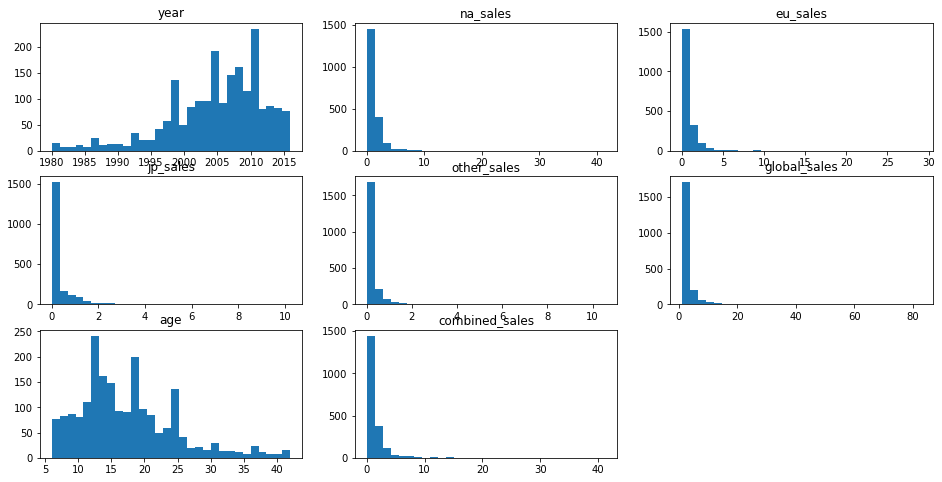

In [23]:
plt.figure(figsize=(16,8))

for i, col in enumerate(quantitative_values[1:]):
    plot_number = i + 1
    plt.subplot(3,3,plot_number)
    plt.title(col)
    games[col].hist(bins = 30)
    plt.grid(False)

# Takeaways
* 'year' seems to be the only feature that is normaly(ish) distributed.
* All other features are right skewed.

### Loop through the qualitative values and show the distribution of each on a separate subplot.

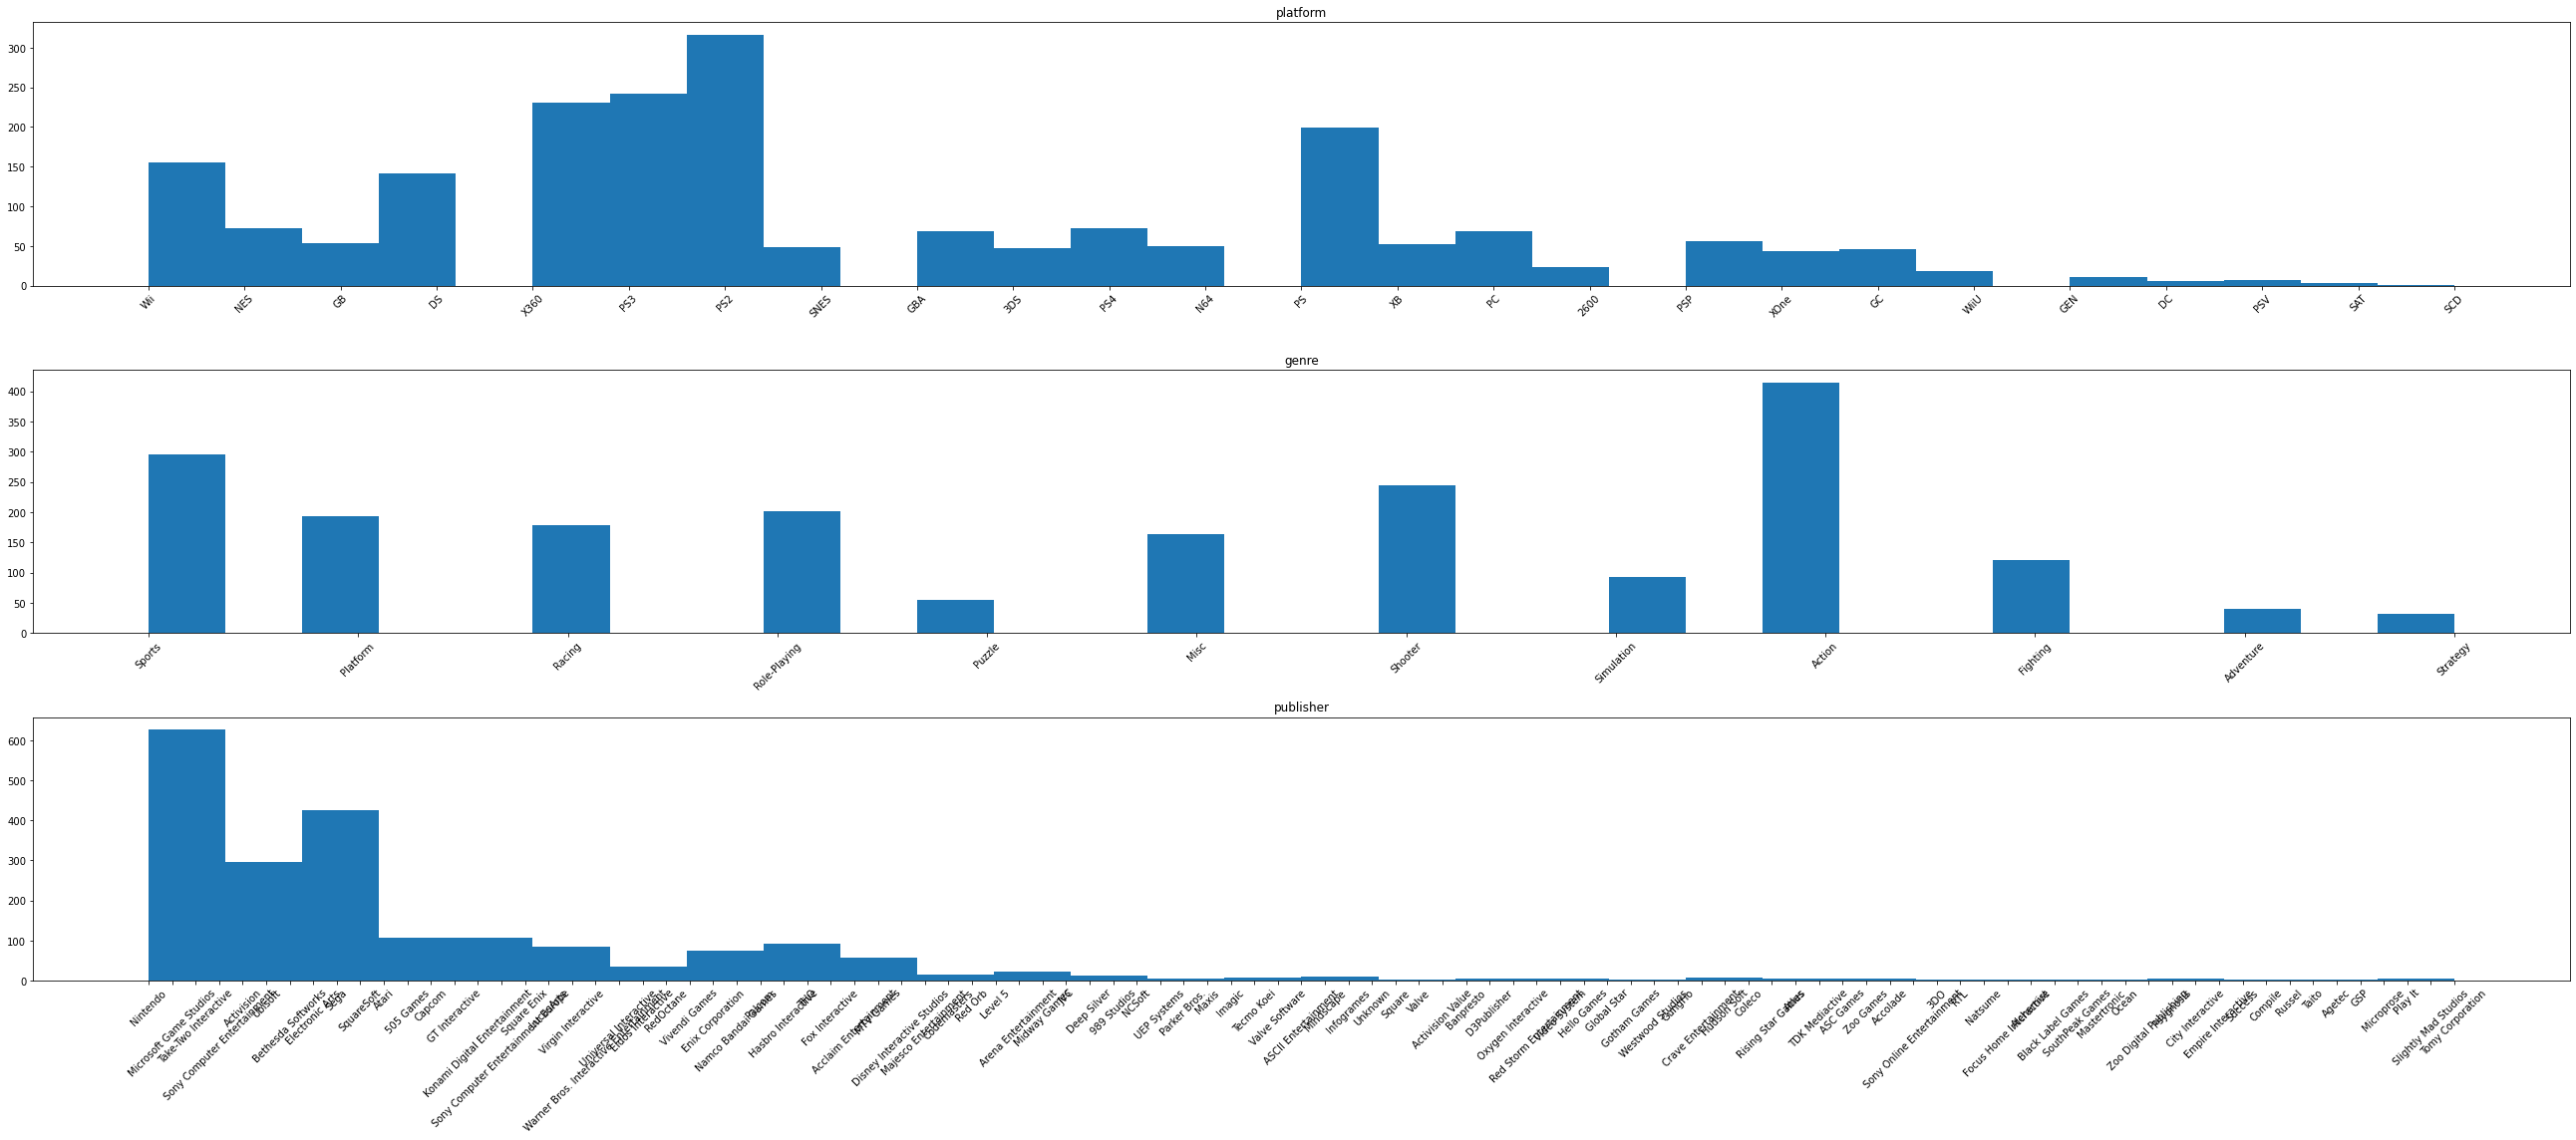

In [24]:
plt.figure(figsize=(36,16))

for i, col in enumerate(qualitative_values[1:]):
    plot_number = i + 1
    plt.subplot(3,1,plot_number)
    plt.title(col)
    games[col].hist(bins = 30, align='mid')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()

# Takeaways
* The PS2 is the highest selling platform.
* Nintendo created the most game consoles.
* Out of the Nintendo consoles the Wii sold the most units.
* Action and sports games are two of the most popular genres.
* My favorite genre, Role-Playing, is the fourth most popular genre.
* Puzzle, simulation, adventure, and strategy are the least popular genres.
* Nintendo and Microsoft Game Studios produced the most amount of games.

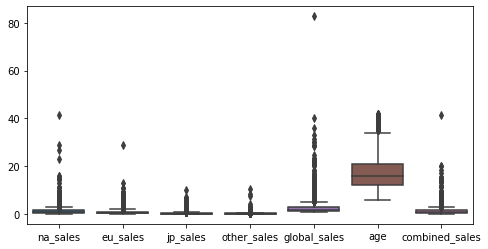

In [25]:
plt.figure(figsize=(8,4))

# Create boxplots for all quantitative values.
sns.boxplot(data=games.drop(columns=['year','rank']))
plt.show()

# Takeaways
* All columns have many outliers. I'm not sure what to do with them at this point.
* I'll leave them in for now and see if they affect my model.

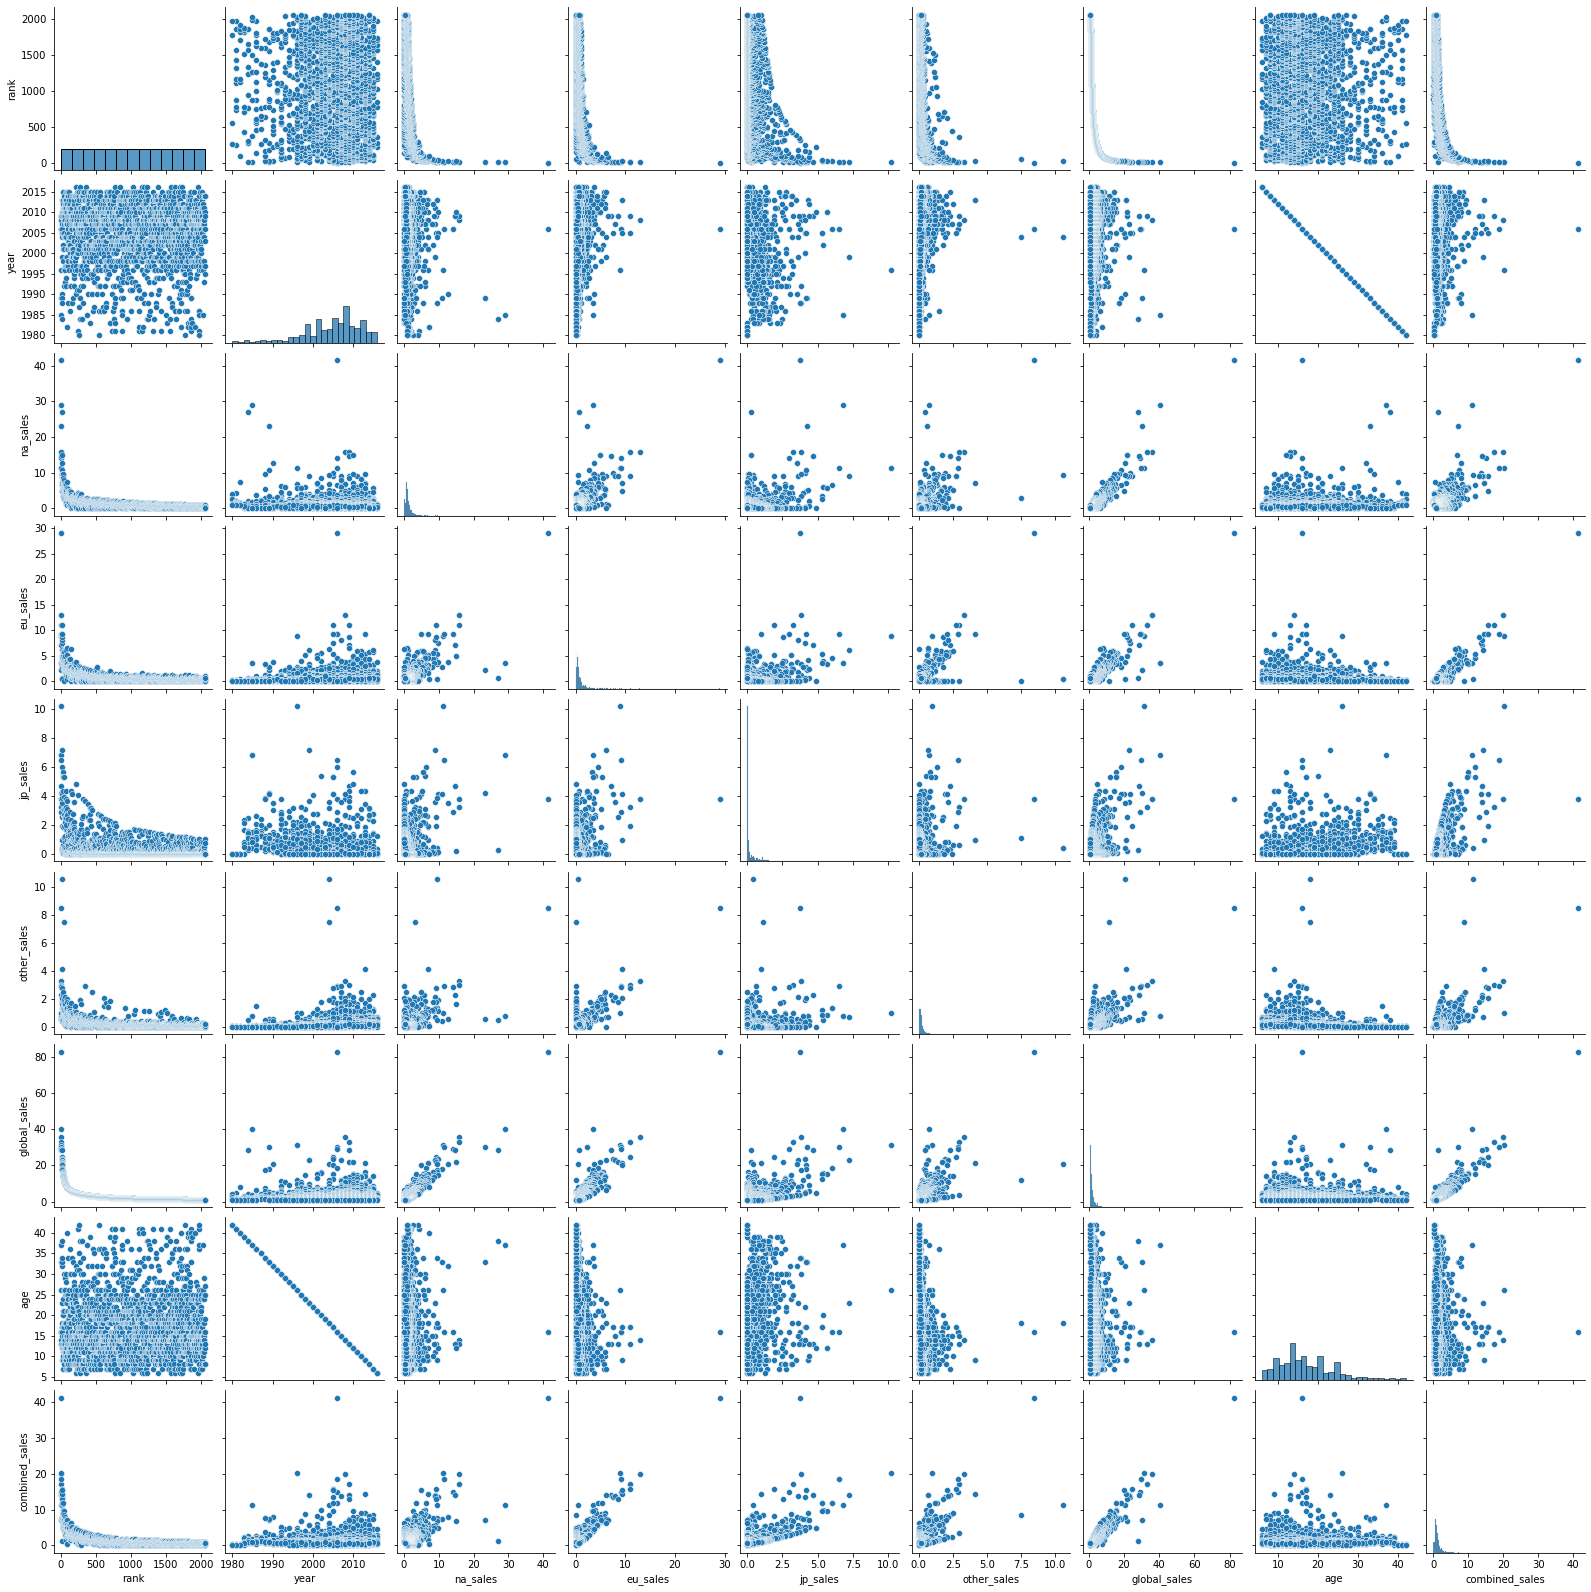

In [26]:
sns.pairplot(games)

# Takeaways
* Our target seems to have a positive correlation with all the other features.
* I will use EDA to confirm.

# Hypothesize

### 1) Newer games have higher North American sales than older games.

### 2) A combination of sales outside of North America is a good indicator of North American sales.

# Split the data

In [27]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(games, test_size=.2, 
                                        random_state=123)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)

print("train observations: ", train.shape[0])
print("validate observations: ", validate.shape[0])
print("test observations: ", test.shape[0])

train observations:  1136
validate observations:  488
test observations:  407


In [28]:
train.shape

(1136, 13)

In [29]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1428 to 2007
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            488 non-null    int64  
 1   name            488 non-null    object 
 2   platform        488 non-null    object 
 3   year            488 non-null    int64  
 4   genre           488 non-null    object 
 5   publisher       488 non-null    object 
 6   na_sales        488 non-null    float64
 7   eu_sales        488 non-null    float64
 8   jp_sales        488 non-null    float64
 9   other_sales     488 non-null    float64
 10  global_sales    488 non-null    float64
 11  age             488 non-null    int64  
 12  combined_sales  488 non-null    float64
dtypes: float64(6), int64(3), object(4)
memory usage: 53.4+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 1733 to 1779
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            407 non-null    int64  
 1   name            407 non-null    object 
 2   platform        407 non-null    object 
 3   year            407 non-null    int64  
 4   genre           407 non-null    object 
 5   publisher       407 non-null    object 
 6   na_sales        407 non-null    float64
 7   eu_sales        407 non-null    float64
 8   jp_sales        407 non-null    float64
 9   other_sales     407 non-null    float64
 10  global_sales    407 non-null    float64
 11  age             407 non-null    int64  
 12  combined_sales  407 non-null    float64
dtypes: float64(6), int64(3), object(4)
memory usage: 44.5+ KB


In [31]:
# Get familiar with train.
train

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales
2030,2032,Shrek 2,GC,2004,Platform,Activision,0.73,0.26,0.01,0.03,1.02,18,0.30
1329,1331,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.45,12,1.34
1670,1672,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20,7,0.69
961,963,Sly 2: Band of Thieves,PS2,2004,Platform,Sony Computer Entertainment,0.88,0.69,0.00,0.23,1.81,18,0.92
1228,1230,Dead Space 2,X360,2011,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,1.52,11,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,727,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,0.62,0.18,0.16,2.22,9,0.96
1330,1332,Tony Hawk's American Wasteland (Weekly america...,PS2,2005,Sports,Activision,1.38,0.05,0.00,0.02,1.45,17,0.07
1961,1963,Seek and Destroy,PS2,2002,Racing,Play It,0.52,0.40,0.00,0.14,1.06,20,0.54
909,911,Need for Speed Rivals,PS4,2013,Racing,Electronic Arts,0.73,0.91,0.03,0.22,1.89,9,1.16


# Target Variable: 'na_sales'
#### Separate the target variable from the independent variables and drop columns that may cause target leakage and any other unwanted columns.

In [32]:
# Create a dataframe called 'X_train' that drops 'na_sales'(target), 'rank', 'name', and 'global_sales'.
X_train = train.drop(columns=['na_sales','rank','name','global_sales','year'])
X_validate = validate.drop(columns=['na_sales','rank','name','global_sales','year'])
X_test = test.drop(columns=['na_sales','rank','name','global_sales','year'])

In [33]:
# Create variables that hold values for the target.
y_train = train.na_sales
y_validate = validate.na_sales
y_test = test.na_sales

In [34]:
len(y_train), len(y_validate), len(y_test)

(1136, 488, 407)

## Scale data using Min-Max Scaler

In [35]:
# Create two separate dataframes. One for quantitative values and the other for qualitative values.
quantitative_values = X_train.select_dtypes(exclude='object').columns
qualitative_values = X_train.select_dtypes(include='object').columns

In [36]:
quantitative_values ,qualitative_values

(Index(['eu_sales', 'jp_sales', 'other_sales', 'age', 'combined_sales'], dtype='object'),
 Index(['platform', 'genre', 'publisher'], dtype='object'))

In [37]:
X_train[qualitative_values]

,platform,genre,publisher
2030,GC,Platform,Activision
1329,DS,Role-Playing,Square Enix
1670,Wii,Misc,Ubisoft
961,PS2,Platform,Sony Computer Entertainment
1228,X360,Shooter,Electronic Arts
...,...,...,...
725,WiiU,Platform,Nintendo
1330,PS2,Sports,Activision
1961,PS2,Racing,Play It
909,PS4,Racing,Electronic Arts


In [38]:
X_train[quantitative_values]

,eu_sales,jp_sales,other_sales,age,combined_sales
2030,0.26,0.01,0.03,18,0.30
1329,0.08,1.24,0.02,12,1.34
1670,0.59,0.00,0.10,7,0.69
961,0.69,0.00,0.23,18,0.92
1228,0.45,0.00,0.13,11,0.58
...,...,...,...,...,...
725,0.62,0.18,0.16,9,0.96
1330,0.05,0.00,0.02,17,0.07
1961,0.40,0.00,0.14,20,0.54
909,0.91,0.03,0.22,9,1.16


In [39]:
scaler = sklearn.preprocessing.MinMaxScaler()
# We will only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[quantitative_values])

X_train_scaled = scaler.transform(X_train[quantitative_values])
X_validate_scaled = scaler.transform(X_validate[quantitative_values])
X_test_scaled = scaler.transform(X_test[quantitative_values])

In [40]:
df1 = pd.DataFrame(X_train_scaled, columns = quantitative_values, index = X_train.index)
df2 = X_train[qualitative_values]

In [41]:
df1

,eu_sales,jp_sales,other_sales,age,combined_sales
2030,0.020186,0.000978,0.009063,0.333333,0.014918
1329,0.006211,0.121331,0.006042,0.166667,0.066634
1670,0.045807,0.000000,0.030211,0.027778,0.034311
961,0.053571,0.000000,0.069486,0.333333,0.045748
1228,0.034938,0.000000,0.039275,0.138889,0.028841
...,...,...,...,...,...
725,0.048137,0.017613,0.048338,0.083333,0.047737
1330,0.003882,0.000000,0.006042,0.305556,0.003481
1961,0.031056,0.000000,0.042296,0.388889,0.026852
909,0.070652,0.002935,0.066465,0.083333,0.057683


In [42]:
X_train_scaled = df1

In [43]:
X_train_scaled

,eu_sales,jp_sales,other_sales,age,combined_sales
2030,0.020186,0.000978,0.009063,0.333333,0.014918
1329,0.006211,0.121331,0.006042,0.166667,0.066634
1670,0.045807,0.000000,0.030211,0.027778,0.034311
961,0.053571,0.000000,0.069486,0.333333,0.045748
1228,0.034938,0.000000,0.039275,0.138889,0.028841
...,...,...,...,...,...
725,0.048137,0.017613,0.048338,0.083333,0.047737
1330,0.003882,0.000000,0.006042,0.305556,0.003481
1961,0.031056,0.000000,0.042296,0.388889,0.026852
909,0.070652,0.002935,0.066465,0.083333,0.057683


In [44]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict na_sales_pred_mean
na_sales_pred_mean = y_train['na_sales'].mean()
y_train['na_sales_pred_mean'] = na_sales_pred_mean
y_validate['na_sales_pred_mean'] = na_sales_pred_mean

# 2. compute na_sales_pred_median
na_sales_pred_median = y_train['na_sales'].median()
y_train['na_sales_pred_median'] = na_sales_pred_median
y_validate['na_sales_pred_median'] = na_sales_pred_median

# 3. RMSE of na_sales_pred_mean
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of na_sales_pred_median
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  1.89 
Validate/Out-of-Sample:  1.73
RMSE using Median
Train/In-Sample:  1.95 
Validate/Out-of-Sample:  1.76


### Use Mean As Baseline Model
An RMSE value of 1.73 is the number to beat.

## Use these regression models:
1) Linear Regression(OLS)

2) LassoLars

3) Tweedie Regressor(GLM)

4) Polynomial Regression

# Linear Regression(OLS)

In [45]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.na_sales)

# predict train
y_train['na_sales_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_lm)**(1/2)

# predict validate
y_validate['na_sales_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.3331706483506864 
Validation/Out-of-Sample:  1.4995342903426632


# LassoLars

In [46]:
# create the model object
lars = LassoLars(alpha= 2.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.na_sales)

# predict train
y_train['na_sales_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_lars)**(1/2)

# predict validate
y_validate['na_sales_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  1.8911685836225944 
Validation/Out-of-Sample:  1.7293645213735436


# Tweedie Regressor

In [47]:
# create the model object
glm = TweedieRegressor(power=0, alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.na_sales)

# predict train
y_train['na_sales_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_glm)**(1/2)

# predict validate
y_validate['na_sales_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  1.8659949850090982 
Validation/Out-of-Sample:  1.7118146621841193


# Polynomial Regression

In [48]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [49]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.na_sales)

# predict train
y_train['na_sales_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.na_sales, y_train.na_sales_pred_lm2)**(1/2)

# predict validate
y_validate['na_sales_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.na_sales, y_validate.na_sales_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1.144198388407772 
Validation/Out-of-Sample:  4.617032763027234


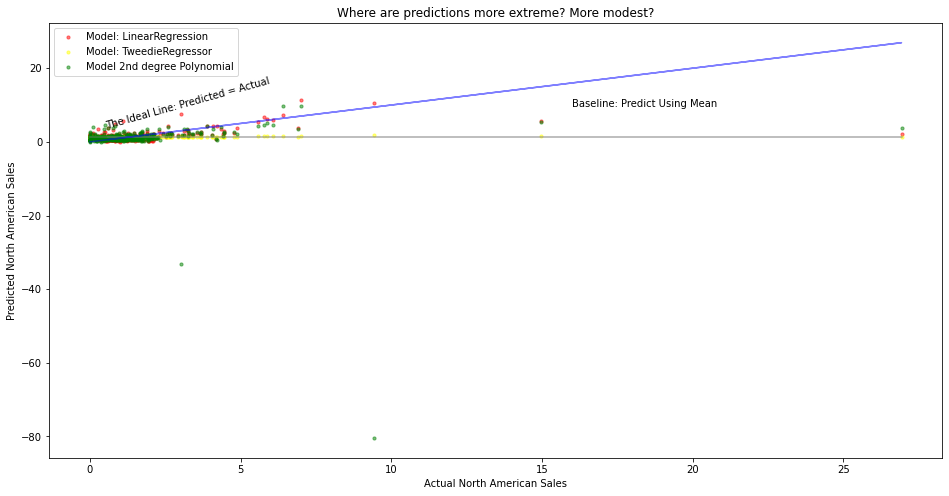

In [50]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.na_sales, y_validate.na_sales_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.na_sales, y_validate.na_sales, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.na_sales, y_validate.na_sales_pred_lm, 
            alpha=.5, color="red", s=10, label="Model: LinearRegression")
plt.scatter(y_validate.na_sales, y_validate.na_sales_pred_glm, 
            alpha=.5, color="yellow", s=10, label="Model: TweedieRegressor")
plt.scatter(y_validate.na_sales, y_validate.na_sales_pred_lm2, 
            alpha=.5, color="green", s=10, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual North American Sales")
plt.ylabel("Predicted North American Sales")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()